<a href="https://colab.research.google.com/github/karenwky/learn-hugging-face/blob/main/learn_hugging_face_text_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Install dependencies

try:
  import datasets, evaluate, accelerate
  import gradio as gr
except ModuleNotFoundError:
  !pip install -U datasets evaluate accelerate gradio
  import datasets, evaluate, accelerate
  import gradio as gr

import random

import numpy as np
import pandas as pd

import torch
import transformers

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 491.2/491.2 kB 7.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 84.0/84.0 kB 4.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 354.7/354.7 kB 10.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.9/46.9 MB 9.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 322.2/322.2 kB 12.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 7.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 95.2/95.2 kB 5.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 183.9/183.9 kB 9.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 143.5/143.5 kB 9.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.5/11.5 MB 36.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 72.0/72.0 kB 2.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.

In [ ]:
print(f"Datasets version: {datasets.__version__}")
print(f"PyTorch version: {torch.__version__}")
print(f"Transformers version: {transformers.__version__}")

Datasets version: 3.5.0
PyTorch version: 2.6.0+cu124
Transformers version: 4.51.1


In [ ]:
# Import dataset

from datasets import load_dataset

dataset = load_dataset(path="mrdbourke/learn_hf_food_not_food_image_captions")
dataset

README.md:   0%|          | 0.00/1.32k [00:00<?, ?B/s]

train-00000-of-00001.parquet:   0%|          | 0.00/11.9k [00:00<?, ?B/s]

Generating train split:   0%|          | 0/250 [00:00<?, ? examples/s]

DatasetDict({
    train: Dataset({
        features: ['text', 'label'],
        num_rows: 250
    })
})

In [ ]:
# Features

dataset.column_names

{'train': ['text', 'label']}

If not defining split in `load_dataset`, all data will be for training.

In [ ]:
# Access the training split

dataset["train"]

Dataset({
    features: ['text', 'label'],
    num_rows: 250
})

In [ ]:
# Check sample data

dataset["train"][0]

{'text': 'Creamy cauliflower curry with garlic naan, featuring tender cauliflower in a rich sauce with cream and spices, served with garlic naan bread.',
 'label': 'food'}

In [ ]:
# Random indices

random_indices = random.sample(range(len(dataset["train"])), 5)
random_indices

[162, 74, 95, 190, 189]

In [ ]:
# Check random sample data

random_samples = dataset["train"][random_indices]
random_samples

{'text': ['A colorful bowl of mixed carrots, including orange and purple.',
  'Set of paintbrushes stored in a jar',
  'Set of keys hanging on a hook by the door',
  'Asparagus in a bowl, sprinkled with Parmesan cheese and served with a side of hollandaise sauce for a classic, flavorful dish.',
  'Set of board games stacked on a shelf'],
 'label': ['food', 'not_food', 'not_food', 'food', 'not_food']}

In [ ]:
# Print prettify

print(f"[INFO] Random samples from dataset:")

for text, label in zip(random_samples["text"], random_samples["label"]):
  print(f"Text: {text} | Label: {label}")

[INFO] Random samples from dataset:
Text: A colorful bowl of mixed carrots, including orange and purple. | Label: food
Text: Set of paintbrushes stored in a jar | Label: not_food
Text: Set of keys hanging on a hook by the door | Label: not_food
Text: Asparagus in a bowl, sprinkled with Parmesan cheese and served with a side of hollandaise sauce for a classic, flavorful dish. | Label: food
Text: Set of board games stacked on a shelf | Label: not_food


In [ ]:
# Check random sample data (write in a function)

def random_sample_data(dataset):

  print(f"[INFO] Random indices from dataset:")

  random_indices = random.sample(range(len(dataset["train"])), 5)
  print(random_indices, "\n")

  random_samples = dataset["train"][random_indices]

  print(f"[INFO] Random samples from dataset:")

  for text, label in zip(random_samples["text"], random_samples["label"]):
    print(f"Text: {text} | Label: {label}")

In [ ]:
random_sample_data(dataset)

[INFO] Random indices from dataset:
[199, 173, 129, 231, 18] 

[INFO] Random samples from dataset:
Text: Crunchy sushi roll with a creamy filling, featuring shrimp tempura and avocado. | Label: food
Text: Microscope set up on a table | Label: not_food
Text: Vintage telephone sitting on a desk | Label: not_food
Text: Fishing rod propped against a dock | Label: not_food
Text: A pair of slices from a barbecue chicken pizza | Label: food


In [ ]:
# Get unique label values

dataset["train"].unique("label")

['food', 'not_food']

In [ ]:
# Check the count of each label

from collections import Counter

Counter(dataset["train"]["label"])

Counter({'food': 125, 'not_food': 125})

In [ ]:
# Turn dataset into DataFrame and get a random sample

food_not_food_df = pd.DataFrame(dataset["train"])
food_not_food_df.sample(5)

,text,label
54,A bowl of sliced bell peppers with a sprinkle ...,food
243,"Relaxing on the porch, a couple enjoys the com...",not_food
166,Fusion sushi roll with ingredients like cream ...,food
209,A close-up of a man and his dog sharing a quie...,not_food
203,"Creamy mild korma curry, featuring tender chic...",food


In [ ]:
food_not_food_df["label"].value_counts()

,count
label,
food,125
not_food,125


In [ ]:
# Create mappings for labels to numeric value

id2label = {0: "not_food", 1: "food"}
label2id = {"not_food": 0, "food": 1}

print(id2label)
print(label2id)

{0: 'not_food', 1: 'food'}
{'not_food': 0, 'food': 1}


In [ ]:
dataset.unique("label")

{'train': ['food', 'not_food']}

In [ ]:
dataset["train"].unique("label")[::-1]

['not_food', 'food']

In [ ]:
# Create mappings programmatically from dataset

id2label = {idx: label for idx, label in enumerate(dataset["train"].unique("label")[::-1])}
id2label

{0: 'not_food', 1: 'food'}

In [ ]:
label2id = {label: idx for idx, label in enumerate(dataset["train"].unique("label")[::-1])}
label2id

{'not_food': 0, 'food': 1}

In [ ]:
# Turn labels into 0 or 1

def map_labels_number(example):
  example["label"] = label2id[example["label"]]
  return example

example_sample = {"text": "My favorite food is salmon", "label": "food"}

# Test function
map_labels_number(example_sample)

{'text': 'My favorite food is salmon', 'label': 1}

In [ ]:
# Map dataset labels to numbers

dataset = dataset["train"].map(map_labels_number)
dataset[:5]

Map:   0%|          | 0/250 [00:00<?, ? examples/s]

{'text': ['Creamy cauliflower curry with garlic naan, featuring tender cauliflower in a rich sauce with cream and spices, served with garlic naan bread.',
  'Set of books stacked on a desk',
  'Watching TV together, a family has their dog stretched out on the floor',
  'Wooden dresser with a mirror reflecting the room',
  'Lawn mower stored in a shed'],
 'label': [1, 0, 0, 0, 0]}

In [ ]:
# Shuffle data

dataset.shuffle()[:5]

{'text': ['A bowl of sliced mango with a drizzle of honey and a sprinkle of Tajin seasoning',
  'White bathtub with a shower curtain ready for a soak',
  'Set of tools organized in a garage',
  'Silver toaster oven sitting on a kitchen counter',
  "King-size bed with a white comforter inviting a good night's sleep"],
 'label': [1, 0, 0, 0, 0]}

In [ ]:
# Split dataset into train/test splits

dataset = dataset.train_test_split(test_size=0.2, seed=42)
dataset

DatasetDict({
    train: Dataset({
        features: ['text', 'label'],
        num_rows: 200
    })
    test: Dataset({
        features: ['text', 'label'],
        num_rows: 50
    })
})

In [ ]:
random_idx_train = random.randint(0, len(dataset["train"]))
random_sample_train = dataset["train"][random_idx_train]

print(random_idx_train)
print(random_sample_train)

124
{'text': 'Washing machine and dryer side by side in a laundry room', 'label': 0}


In [ ]:
random_idx_test = random.randint(0, len(dataset["test"]))
random_sample_test = dataset["test"][random_idx_test]

print(random_idx_test)
print(random_sample_test)

48
{'text': 'Set of measuring cups nested in a drawer', 'label': 0}


In [ ]:
# Check label count

train_counter = Counter(dataset["train"]["label"])
test_counter = Counter(dataset["test"]["label"])

print("Train: ", train_counter)
print("Test: ", test_counter)

Train:  Counter({0: 108, 1: 92})
Test:  Counter({1: 33, 0: 17})


In [ ]:
print("Train total: ", train_counter.total())
print("Test total: ", test_counter.total())

Train total:  200
Test total:  50


In [ ]:
# Check proportion of label difference

print(f"Proportional difference in training set: {(train_counter[0] - train_counter[1]) / train_counter.total() * 100:.2f}%")
print(f"Proportional difference in whole set: {(train_counter[0] - train_counter[1]) / (train_counter.total() + test_counter.total()) * 100:.2f}%")

Proportional difference in training set: 8.00%
Proportional difference in whole set: 6.40%


In [ ]:
from transformers import AutoTokenizer

tokenizer = AutoTokenizer.from_pretrained(pretrained_model_name_or_path="distilbert/distilbert-base-uncased",
                                          use_fast=True) #fast implementation (on by default)

tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/483 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

In [ ]:
tokenizer

DistilBertTokenizerFast(name_or_path='distilbert/distilbert-base-uncased', vocab_size=30522, model_max_length=512, is_fast=True, padding_side='right', truncation_side='right', special_tokens={'unk_token': '[UNK]', 'sep_token': '[SEP]', 'pad_token': '[PAD]', 'cls_token': '[CLS]', 'mask_token': '[MASK]'}, clean_up_tokenization_spaces=False, added_tokens_decoder={
	0: AddedToken("[PAD]", rstrip=False, lstrip=False, single_word=False, normalized=False, special=True),
	100: AddedToken("[UNK]", rstrip=False, lstrip=False, single_word=False, normalized=False, special=True),
	101: AddedToken("[CLS]", rstrip=False, lstrip=False, single_word=False, normalized=False, special=True),
	102: AddedToken("[SEP]", rstrip=False, lstrip=False, single_word=False, normalized=False, special=True),
	103: AddedToken("[MASK]", rstrip=False, lstrip=False, single_word=False, normalized=False, special=True),
}
)

In [ ]:
# Test out the tokenizer

tokenizer("I love pizza")

{'input_ids': [101, 1045, 2293, 10733, 102], 'attention_mask': [1, 1, 1, 1, 1]}

In [ ]:
tokenizer("capybara sleeping in the universe!")

{'input_ids': [101, 6178, 2100, 20709, 5777, 1999, 1996, 5304, 999, 102], 'attention_mask': [1, 1, 1, 1, 1, 1, 1, 1, 1, 1]}

In [ ]:
tokenizer.model_input_names

['input_ids', 'attention_mask']

- `input_ids`:  text turned into numbers
- `attention_mask`: whether or not to pay attention to certain tokens *(the model is not trained yet, so everything 1)*

In [ ]:
# Get the length of tokenizer vocab

length_of_takenizer_vocab = len(tokenizer.vocab) # tokenizer.vocab_size
print(f"[INFO] Number of items in tokenizer vocab: {length_of_takenizer_vocab}")

# Get the maximun sequence length the tokenizer can handle

max_tokenizer_input_sequence_length = tokenizer.model_max_length
print(f"[INFO] Maximum tokenizer input sequense length: {max_tokenizer_input_sequence_length}")

[INFO] Number of items in tokenizer vocab: 30522
[INFO] Maximum tokenizer input sequense length: 512


In [ ]:
# Does "karen" occur in the vocab?

tokenizer.vocab["karen"]

8129

In [ ]:
tokenizer.vocab_files_names

{'vocab_file': 'vocab.txt', 'tokenizer_file': 'tokenizer.json'}

In [ ]:
type(tokenizer.vocab)

dict

In [ ]:
dict(list(tokenizer.vocab.items())[10:15])

{'##nac': 18357,
 'luminous': 25567,
 'belgrade': 10291,
 'confluence': 13693,
 'marley': 20326}

In [ ]:
dict(list(tokenizer.vocab.items())[-5:])

{'##♦': 30153,
 'curiosity': 10628,
 'opens': 7480,
 'lurched': 21977,
 'abbess': 28010}

In [ ]:
# How does the tokenizer deal with words not in vocab?

tokenizer("akash")

{'input_ids': [101, 9875, 4095, 102], 'attention_mask': [1, 1, 1, 1]}

In [ ]:
tokenizer("akash").input_ids

[101, 9875, 4095, 102]

In [ ]:
tokenizer.convert_ids_to_tokens(tokenizer("akash").input_ids)

['[CLS]', 'aka', '##sh', '[SEP]']

In [ ]:
print(tokenizer.all_special_tokens)
print(tokenizer.all_special_ids)

['[UNK]', '[SEP]', '[PAD]', '[CLS]', '[MASK]']
[100, 102, 0, 101, 103]


### Description of Special Tokens

Special tokens are specific symbols or sequences used in natural language processing (NLP) models to handle various tasks and ensure proper model behavior. These tokens are not part of the standard vocabulary but serve special purposes during tokenization, encoding, and decoding processes. Below is a simple description of some common special tokens:

- **`[UNK]`**: Represents unknown words.
- **`[SEP]`**: Separates different segments or sentences.
- **`[PAD]`**: Used for padding sequences to a fixed length.
- **`[CLS]`**: Indicates the start of a sequence for classification tasks.
- **`[MASK]`**: Used for masked language modeling.

<details>
  <summary><b>Detailed Explanation</b></summary>
  
1. **`[PAD]` (Padding Token)**:
   - Used to pad sequences to a fixed length when batching inputs.
   - Ensures all input sequences have the same length for efficient computation.
   - Typically assigned an ID and ignored during training or inference.

2. **`[SEP]` (Separator Token)**:
   - Used to separate different segments or sentences within a single input.
   - Commonly used in tasks like question-answering or sentence-pair classification.
   - Helps the model distinguish between different parts of the input.

3. **`[CLS]` (Classification Token)**:
   - Added at the beginning of the input sequence.
   - Represents the entire sequence and is often used as the output for classification tasks.
   - The hidden state corresponding to this token is typically used for downstream tasks.

4. **`[MASK]` (Masked Token)**:
   - Used in masked language modeling (MLM) tasks.
   - Replaces certain tokens in the input sequence to train the model to predict missing words.
   - Essential for pre-training models like BERT.

5. **`[UNK]` (Unknown Token)**:
   - Represents out-of-vocabulary (OOV) words that are not present in the model's vocabulary.
   - Helps the model handle rare or unseen words during inference.

6. **`[EOS]` (End of Sequence Token)**:
   - Marks the end of a sequence.
   - Useful in tasks like text generation or dialogue systems.

7. **`[BOS]` (Beginning of Sequence Token)**:
   - Marks the start of a sequence.
   - Often used in conjunction with `[EOS]` to define the boundaries of a sequence.

8. **`[unusedX]`**:
   - Reserved tokens that can be customized for specific tasks.
   - For example, they might be used to represent entity tags or other metadata.

</details>


In [ ]:
# Try tokenize emoji

tokenizer("❤️‍🔥")

{'input_ids': [101, 100, 102], 'attention_mask': [1, 1, 1]}

In [ ]:
tokenizer.convert_ids_to_tokens(tokenizer("❤️‍🔥").input_ids)

['[CLS]', '[UNK]', '[SEP]']

In [ ]:
# Get the first 5 items in tokenizer vocab

sorted(tokenizer.vocab.items())[:5]

[('!', 999), ('"', 1000), ('#', 1001), ('##!', 29612), ('##"', 29613)]

In [ ]:
random.sample(sorted(tokenizer.vocab.items()), k=5)

[('decade', 5476),
 ('blues', 5132),
 ('impossible', 5263),
 ('shanghai', 8344),
 ('clerical', 23106)]

In [ ]:
# Function to tokenize text

def tokenize_text(examples):
  """
  Tokenize given example text and return the tokenized text.
  """

  return tokenizer(examples["text"],
                   padding=True, # pad short sequences to longest sequence length in batch (e.g. if sample length = 100, sample will be padded to 512 or longest sample in the batch)
                   truncation=True) # truncate long sequences to the maximum length the model can handle (e.g. if sample length = 1000, model length = 512, sample will be shortened to 512)

In [ ]:
example_sample_2 = {"text": "I like cats!", "label": 0}

# Test the function

tokenize_text(example_sample_2)

{'input_ids': [101, 1045, 2066, 8870, 999, 102], 'attention_mask': [1, 1, 1, 1, 1, 1]}

In [ ]:
tokenizer.convert_ids_to_tokens(tokenize_text(example_sample_2).input_ids)

['[CLS]', 'i', 'like', 'cats', '!', '[SEP]']

In [ ]:
long_text = "I like cats! " * 1000
len(long_text)

13000

In [ ]:
tokenize_text({"text": long_text, "label": 0})

{'input_ids': [101, 1045, 2066, 8870, 999, 1045, 2066, 8870, 999, 1045, 2066, 8870, 999, 1045, 2066, 8870, 999, 1045, 2066, 8870, 999, 1045, 2066, 8870, 999, 1045, 2066, 8870, 999, 1045, 2066, 8870, 999, 1045, 2066, 8870, 999, 1045, 2066, 8870, 999, 1045, 2066, 8870, 999, 1045, 2066, 8870, 999, 1045, 2066, 8870, 999, 1045, 2066, 8870, 999, 1045, 2066, 8870, 999, 1045, 2066, 8870, 999, 1045, 2066, 8870, 999, 1045, 2066, 8870, 999, 1045, 2066, 8870, 999, 1045, 2066, 8870, 999, 1045, 2066, 8870, 999, 1045, 2066, 8870, 999, 1045, 2066, 8870, 999, 1045, 2066, 8870, 999, 1045, 2066, 8870, 999, 1045, 2066, 8870, 999, 1045, 2066, 8870, 999, 1045, 2066, 8870, 999, 1045, 2066, 8870, 999, 1045, 2066, 8870, 999, 1045, 2066, 8870, 999, 1045, 2066, 8870, 999, 1045, 2066, 8870, 999, 1045, 2066, 8870, 999, 1045, 2066, 8870, 999, 1045, 2066, 8870, 999, 1045, 2066, 8870, 999, 1045, 2066, 8870, 999, 1045, 2066, 8870, 999, 1045, 2066, 8870, 999, 1045, 2066, 8870, 999, 1045, 2066, 8870, 999, 1045, 2066, 88

In [ ]:
tokenized_long_text = tokenize_text({"text": long_text, "label": 0})
len(tokenized_long_text["input_ids"]) # truncation

512

In [ ]:
dataset

DatasetDict({
    train: Dataset({
        features: ['text', 'label'],
        num_rows: 200
    })
    test: Dataset({
        features: ['text', 'label'],
        num_rows: 50
    })
})

In [ ]:
# Map tokenize text function to dataset

tokenized_dataset = dataset.map(function=tokenize_text,
                                batched=True, # set batched=True to tokenize across batches of samples at a time rather than one at a time
                                batch_size=1000) # experiment with the parameter value depending on hardware available, default is 1000

tokenized_dataset

Map:   0%|          | 0/200 [00:00<?, ? examples/s]

Map:   0%|          | 0/50 [00:00<?, ? examples/s]

DatasetDict({
    train: Dataset({
        features: ['text', 'label', 'input_ids', 'attention_mask'],
        num_rows: 200
    })
    test: Dataset({
        features: ['text', 'label', 'input_ids', 'attention_mask'],
        num_rows: 50
    })
})

**Note:** In machine learning, it is ofter faster to do things in batches rather than one at a time due to leveraging computer hardware parallelization.

*Parallel computing refers to the process of breaking down larger problems into smaller, independent, often similar parts that can be executed simultaneously by multiple processors communicating via shared memory [[1]](https://www.heavy.ai/technical-glossary/parallel-computing)*

In [ ]:
# Get samples from tokenized dataset

train_tokenized_sample = tokenized_dataset["train"][0]
test_tokenized_sample = tokenized_dataset["test"][0]

print(train_tokenized_sample)
print(test_tokenized_sample)

{'text': 'Set of headphones placed on a desk', 'label': 0, 'input_ids': [101, 2275, 1997, 2132, 19093, 2872, 2006, 1037, 4624, 102, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], 'attention_mask': [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]}
{'text': 'A slice of pepperoni pizza with a layer of melted cheese', 'label': 1, 'input_ids': [101, 1037, 14704, 1997, 11565, 10698, 10733, 2007, 1037, 6741, 1997, 12501, 8808, 102, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], 'attention_mask': [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]}


In [ ]:
# Print prettify

for key in train_tokenized_sample.keys():
  print(f"[INFO] Key: {key}")
  print(f"Train sample: {train_tokenized_sample[key]}")
  print(f"Test sample: {test_tokenized_sample[key]}")
  print()

[INFO] Key: text
Train sample: Set of headphones placed on a desk
Test sample: A slice of pepperoni pizza with a layer of melted cheese

[INFO] Key: label
Train sample: 0
Test sample: 1

[INFO] Key: input_ids
Train sample: [101, 2275, 1997, 2132, 19093, 2872, 2006, 1037, 4624, 102, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
Test sample: [101, 1037, 14704, 1997, 11565, 10698, 10733, 2007, 1037, 6741, 1997, 12501, 8808, 102, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

[INFO] Key: attention_mask
Train sample: [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
Test sample: [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]



## Tokenization Takeaways
1. Tokenizers = turn data into numbers (e.g. text -> map to number)
2. Models have different tokenizers, Hugging Face `Auto` classes (e.g. `AutoTokenizer`, `AutoProcessor`, `AutoModel`) help to match tokenizers to models
3. Tokenization can happen in parallel using `batched` argument in `map` function

In [ ]:
import evaluate
from typing import Tuple

In [ ]:
# Set up evaluation metric

accuracy_metric = evaluate.load("accuracy")
accuracy_metric

EvaluationModule(name: "accuracy", module_type: "metric", features: {'predictions': Value(dtype='int32', id=None), 'references': Value(dtype='int32', id=None)}, usage: """
Args:
    predictions (`list` of `int`): Predicted labels.
    references (`list` of `int`): Ground truth labels.
    normalize (`boolean`): If set to False, returns the number of correctly classified samples. Otherwise, returns the fraction of correctly classified samples. Defaults to True.
    sample_weight (`list` of `float`): Sample weights Defaults to None.

Returns:
    accuracy (`float` or `int`): Accuracy score. Minimum possible value is 0. Maximum possible value is 1.0, or the number of examples input, if `normalize` is set to `True`.. A higher score means higher accuracy.

Examples:

    Example 1-A simple example
        >>> accuracy_metric = evaluate.load("accuracy")
        >>> results = accuracy_metric.compute(references=[0, 1, 2, 0, 1, 2], predictions=[0, 1, 1, 2, 1, 0])
        >>> print(results)
    

In [ ]:
type(accuracy_metric)

evaluate_modules.metrics.evaluate-metric--accuracy.f887c0aab52c2d38e1f8a215681126379eca617f96c447638f751434e8e65b14.accuracy.Accuracy

In [ ]:
def compute_accuracy(predictions_and_labels: Tuple[np.array, np.array]):
  """
  Computes the accuracy of a model by comparing the predictions and labels.
  """

  predictions, labels = predictions_and_labels

  # Get the index of the maximum value from the model output, i.e. the most likely label according to the model (aka prediction)
  if len(predictions.shape) >= 2:
    predictions = np.argmax(predictions, axis=1)

  return accuracy_metric.compute(predictions=predictions, references=labels)

In [ ]:
# Example predictions and accuracy score

example_preds_all_correct = np.array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0])
example_preds_one_incorrect = np.array([0, 0, 0, 0, 0, 0, 0, 1, 0, 0])
example_labels = np.array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

# Test the evaluation function

print(f"Accuracy when all predictions are correct: {compute_accuracy((example_preds_all_correct, example_labels))}")
print(f"Accuracy when all predictions one incorrect: {compute_accuracy((example_preds_one_incorrect, example_labels))}")

Accuracy when all predictions are correct: {'accuracy': 1.0}
Accuracy when all predictions one incorrect: {'accuracy': 0.9}


## Model Training Workflow

1. Create and preprocess data
2. Define the model for solving the problem [[1]](https://huggingface.co/models) [[2]](https://huggingface.co/docs/transformers/en/tasks/sequence_classification)
3. Define training arguments for training the model `transformers.TrainingArguments`
  * These are also known as hyperparameters = settings on your model that you can adjust
  * Parameters = weights/patterns in the model that get updated automatically (the model set for itself)
4. Pass `TrainingArguments` to an instance of `transformers.Trainer`
5. Train the model by calling `Trainer.train()`
6. Save the model to local machine or to Hugging Face Hub
7. Evaluate the trained model by making and inspecting predictions on the test data and custom data
8. Turn the model into a shareable demo

The pre-trained model used for this task: [distilbert/distilbert-base-uncased](https://huggingface.co/distilbert/distilbert-base-uncased)

In [ ]:
from transformers import AutoModelForSequenceClassification

model = AutoModelForSequenceClassification.from_pretrained(
    pretrained_model_name_or_path="distilbert/distilbert-base-uncased", # can be changed into the custom model later on
    num_labels=2, # food and not_food; out_features in classifier
    id2label=id2label,
    label2id=label2id
)

Xet Storage is enabled for this repo, but the 'hf_xet' package is not installed. Falling back to regular HTTP download. For better performance, install the package with: `pip install huggingface_hub[hf_xet]` or `pip install hf_xet`


model.safetensors:   0%|          | 0.00/268M [00:00<?, ?B/s]

Some weights of DistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert/distilbert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight', 'pre_classifier.bias', 'pre_classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [ ]:
model

DistilBertForSequenceClassification(
  (distilbert): DistilBertModel(
    (embeddings): Embeddings(
      (word_embeddings): Embedding(30522, 768, padding_idx=0)
      (position_embeddings): Embedding(512, 768)
      (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (transformer): Transformer(
      (layer): ModuleList(
        (0-5): 6 x TransformerBlock(
          (attention): DistilBertSdpaAttention(
            (dropout): Dropout(p=0.1, inplace=False)
            (q_lin): Linear(in_features=768, out_features=768, bias=True)
            (k_lin): Linear(in_features=768, out_features=768, bias=True)
            (v_lin): Linear(in_features=768, out_features=768, bias=True)
            (out_lin): Linear(in_features=768, out_features=768, bias=True)
          )
          (sa_layer_norm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
          (ffn): FFN(
            (dropout): Dropout(p=0.1, inplace=False)


The model is comprised of the following parts:

1. `embeddings` - embeddings are a form of leaned representation of tokens. So, if tokens are a direct mapping from token to number, embeddings are a learned vector representation.
2. `transformer` - the model architecture backbone, this has discovered patterns/relationships in the embeddings.
3. `classifier` - customize this layer to suit the problem.

**Note:** If getting input errors from passing sample data to a model, make sure the sample data is formatted in the same way the model is trained on. For example, if the model used a specific tokenizer, make sure to tokenize the text before passing it to the model.



## Count the parameters in the model

Weights/Parameters = small numeric opportunities for a model to learn patterns in data.

In [ ]:
list(model.parameters())

[Parameter containing:
 tensor([[-0.0166, -0.0666, -0.0163,  ..., -0.0200, -0.0514, -0.0264],
         [-0.0132, -0.0673, -0.0161,  ..., -0.0227, -0.0554, -0.0260],
         [-0.0176, -0.0709, -0.0144,  ..., -0.0246, -0.0596, -0.0232],
         ...,
         [-0.0231, -0.0588, -0.0105,  ..., -0.0195, -0.0262, -0.0212],
         [-0.0490, -0.0561, -0.0047,  ..., -0.0107, -0.0180, -0.0219],
         [-0.0065, -0.0915, -0.0025,  ..., -0.0151, -0.0504,  0.0460]],
        requires_grad=True),
 Parameter containing:
 tensor([[ 1.7505e-02, -2.5631e-02, -3.6642e-02,  ...,  3.3437e-05,
           6.8312e-04,  1.5441e-02],
         [ 7.7580e-03,  2.2613e-03, -1.9444e-02,  ...,  2.8910e-02,
           2.9753e-02, -5.3247e-03],
         [-1.1287e-02, -1.9644e-03, -1.1573e-02,  ...,  1.4908e-02,
           1.8741e-02, -7.3140e-03],
         ...,
         [ 1.7418e-02,  3.4903e-03, -9.5621e-03,  ...,  2.9599e-03,
           4.3435e-04, -2.6949e-02],
         [ 2.1687e-02, -6.0216e-03,  1.4736e-02,  

In [ ]:
def count_params(model):
  """
  Count the parameters of a PyTorch model.
  """

  trainable_parameters = sum(param.numel() for param in model.parameters() if param.requires_grad) # requires gradient, will be updated with gradient descent during training, which means trainable parameters
  total_parameters = sum(param.numel() for param in model.parameters())

  return {"trainable_parameters": trainable_parameters, "total_parameters": total_parameters}

In [ ]:
count_params(model)

{'trainable_parameters': 66955010, 'total_parameters': 66955010}

In [ ]:
# Create model output directory

from pathlib import Path

# Create models directory

models_dir = Path("models")
models_dir.mkdir(exist_ok=True)

# Create model save name

model_save_name = "learn_hf_food_not_food_text_classifier_distilbert-base-uncased"

# Create model save path

model_save_dir = Path(models_dir, model_save_name)

model_save_dir

PosixPath('models/learn_hf_food_not_food_text_classifier_distilbert-base-uncased')

In [ ]:
from transformers import TrainingArguments

print(f"[INFO] Saving model checkpoints: {model_save_dir}")

BATCH_SIZE = 32

# Create training arguments

training_args = TrainingArguments(
    output_dir=model_save_dir,
    learning_rate=0.0001,
    per_device_train_batch_size=BATCH_SIZE,
    per_device_eval_batch_size=BATCH_SIZE,
    num_train_epochs=10,
    eval_strategy="epoch",
    save_strategy="epoch",
    save_total_limit=3,
    use_cpu=False,
    seed=42,
    load_best_model_at_end=True,
    logging_strategy="epoch",
    report_to="none",
    # hub_token="hf-xxx"
    # push_to_hub=True,
    hub_private_repo=False # default as public
)

[INFO] Saving model checkpoints: models/learn_hf_food_not_food_text_classifier_distilbert-base-uncased


In [ ]:
training_args

TrainingArguments(
_n_gpu=0,
accelerator_config={'split_batches': False, 'dispatch_batches': None, 'even_batches': True, 'use_seedable_sampler': True, 'non_blocking': False, 'gradient_accumulation_kwargs': None, 'use_configured_state': False},
adafactor=False,
adam_beta1=0.9,
adam_beta2=0.999,
adam_epsilon=1e-08,
auto_find_batch_size=False,
average_tokens_across_devices=False,
batch_eval_metrics=False,
bf16=False,
bf16_full_eval=False,
data_seed=None,
dataloader_drop_last=False,
dataloader_num_workers=0,
dataloader_persistent_workers=False,
dataloader_pin_memory=True,
dataloader_prefetch_factor=None,
ddp_backend=None,
ddp_broadcast_buffers=None,
ddp_bucket_cap_mb=None,
ddp_find_unused_parameters=None,
ddp_timeout=1800,
debug=[],
deepspeed=None,
disable_tqdm=False,
do_eval=True,
do_predict=False,
do_train=False,
eval_accumulation_steps=None,
eval_delay=0,
eval_do_concat_batches=True,
eval_on_start=False,
eval_steps=None,
eval_strategy=IntervalStrategy.EPOCH,
eval_use_gather_object=False

In [ ]:
from transformers import Trainer

# Setup Trainer instance

trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=tokenized_dataset["train"],
    eval_dataset=tokenized_dataset["test"],
    processing_class=tokenizer,
    compute_metrics=compute_accuracy
)

trainer

In [ ]:
results = trainer.train()

Epoch,Training Loss,Validation Loss,Accuracy
1,0.443400,0.111616,1.000000
2,0.060200,0.009437,1.000000
3,0.006900,0.002848,1.000000
4,0.002500,0.001517,1.000000
5,0.001500,0.001049,1.000000
6,0.001000,0.000841,1.000000
7,0.000900,0.000733,1.000000
8,0.000800,0.000672,1.000000
9,0.000800,0.000640,1.000000
10,0.000700,0.000629,1.000000


7 steps/epoch = total train size / batch size = 250 / 32 ≈ 7

In [ ]:
input_predictions = np.array([[-1.0402725, 1.4816515]])
input_references = np.array([[1]])

input_predictions.shape

(1, 2)

In [ ]:
if len(input_predictions.shape) >= 2:
  input_predictions = np.argmax(input_predictions, axis=1)

input_predictions

array([1])

In [ ]:
compute_accuracy(predictions_and_labels=(input_predictions, input_references))

{'accuracy': 1.0}

In [ ]:
results

TrainOutput(global_step=70, training_loss=0.0518749968148768, metrics={'train_runtime': 528.8015, 'train_samples_per_second': 3.782, 'train_steps_per_second': 0.132, 'total_flos': 18110777160000.0, 'train_loss': 0.0518749968148768, 'epoch': 10.0})

In [ ]:
# Inspect training metrics

results.metrics

{'train_runtime': 528.8015,
 'train_samples_per_second': 3.782,
 'train_steps_per_second': 0.132,
 'total_flos': 18110777160000.0,
 'train_loss': 0.0518749968148768,
 'epoch': 10.0}

`flops` - floating point operations per second

In [ ]:
# Save model

print(f"[INFO] Saving model to {model_save_dir}")

trainer.save_model(output_dir=model_save_dir)

[INFO] Saving model to models/learn_hf_food_not_food_text_classifier_distilbert-base-uncased


In [ ]:
list(model.parameters()) # stored in model.safetensors

[Parameter containing:
 tensor([[-0.0166, -0.0666, -0.0163,  ..., -0.0200, -0.0514, -0.0264],
         [-0.0132, -0.0673, -0.0161,  ..., -0.0227, -0.0554, -0.0260],
         [-0.0176, -0.0709, -0.0144,  ..., -0.0246, -0.0596, -0.0232],
         ...,
         [-0.0231, -0.0588, -0.0105,  ..., -0.0195, -0.0262, -0.0212],
         [-0.0490, -0.0561, -0.0047,  ..., -0.0107, -0.0180, -0.0219],
         [-0.0065, -0.0915, -0.0025,  ..., -0.0151, -0.0504,  0.0460]],
        requires_grad=True),
 Parameter containing:
 tensor([[ 0.0173, -0.0254, -0.0365,  ..., -0.0002,  0.0007,  0.0151],
         [ 0.0080,  0.0026, -0.0197,  ...,  0.0295,  0.0297, -0.0054],
         [-0.0118, -0.0022, -0.0113,  ...,  0.0149,  0.0187, -0.0079],
         ...,
         [ 0.0174,  0.0035, -0.0096,  ...,  0.0030,  0.0004, -0.0269],
         [ 0.0217, -0.0060,  0.0147,  ..., -0.0056, -0.0126, -0.0281],
         [ 0.0026, -0.0233,  0.0055,  ...,  0.0175,  0.0275, -0.0777]],
        requires_grad=True),
 Parameter con

In [ ]:
# Get training history

trainer_history_all = trainer.state.log_history
trainer_history_metrics = trainer_history_all[:-1]

In [ ]:
trainer_history_all

[{'loss': 0.4434,
  'grad_norm': 2.7001099586486816,
  'learning_rate': 9.142857142857143e-05,
  'epoch': 1.0,
  'step': 7},
 {'eval_loss': 0.11161565035581589,
  'eval_accuracy': 1.0,
  'eval_runtime': 2.7532,
  'eval_samples_per_second': 18.161,
  'eval_steps_per_second': 0.726,
  'epoch': 1.0,
  'step': 7},
 {'loss': 0.0602,
  'grad_norm': 0.18815191090106964,
  'learning_rate': 8.142857142857143e-05,
  'epoch': 2.0,
  'step': 14},
 {'eval_loss': 0.009437408298254013,
  'eval_accuracy': 1.0,
  'eval_runtime': 2.7148,
  'eval_samples_per_second': 18.418,
  'eval_steps_per_second': 0.737,
  'epoch': 2.0,
  'step': 14},
 {'loss': 0.0069,
  'grad_norm': 0.05550307780504227,
  'learning_rate': 7.142857142857143e-05,
  'epoch': 3.0,
  'step': 21},
 {'eval_loss': 0.002848248463124037,
  'eval_accuracy': 1.0,
  'eval_runtime': 2.7193,
  'eval_samples_per_second': 18.387,
  'eval_steps_per_second': 0.735,
  'epoch': 3.0,
  'step': 21},
 {'loss': 0.0025,
  'grad_norm': 0.029672037810087204,
 

In [ ]:
len(trainer_history_metrics)

20

In [ ]:
trainer_history_metrics[0]

{'loss': 0.4434,
 'grad_norm': 2.7001099586486816,
 'learning_rate': 9.142857142857143e-05,
 'epoch': 1.0,
 'step': 7}

In [ ]:
trainer_history_metrics[1]

{'eval_loss': 0.11161565035581589,
 'eval_accuracy': 1.0,
 'eval_runtime': 2.7532,
 'eval_samples_per_second': 18.161,
 'eval_steps_per_second': 0.726,
 'epoch': 1.0,
 'step': 7}

In [ ]:
trainer_history_training_time = trainer_history_all[-1]
trainer_history_training_time

{'train_runtime': 528.8015,
 'train_samples_per_second': 3.782,
 'train_steps_per_second': 0.132,
 'total_flos': 18110777160000.0,
 'train_loss': 0.0518749968148768,
 'epoch': 10.0,
 'step': 70}

In [ ]:
import pprint

# Extract eval and training metrics

trainer_history_training_set = []
trainer_history_eval_set = []

# Loop through the metrics

for item in trainer_history_metrics:
  item_keys = list(item.keys())

  if any("eval" in item for item in item_keys):
    trainer_history_eval_set.append(item)
  else:
    trainer_history_training_set.append(item)

# Get the first two epochs results

print(f"First two items in training epoch:")
pprint.pprint(trainer_history_training_set[:2])
print()
print(f"First two items in eval epoch:")
pprint.pprint(trainer_history_eval_set[:2])

First two items in training epoch:
[{'epoch': 1.0,
  'grad_norm': 2.7001099586486816,
  'learning_rate': 9.142857142857143e-05,
  'loss': 0.4434,
  'step': 7},
 {'epoch': 2.0,
  'grad_norm': 0.18815191090106964,
  'learning_rate': 8.142857142857143e-05,
  'loss': 0.0602,
  'step': 14}]

First two items in eval epoch:
[{'epoch': 1.0,
  'eval_accuracy': 1.0,
  'eval_loss': 0.11161565035581589,
  'eval_runtime': 2.7532,
  'eval_samples_per_second': 18.161,
  'eval_steps_per_second': 0.726,
  'step': 7},
 {'epoch': 2.0,
  'eval_accuracy': 1.0,
  'eval_loss': 0.009437408298254013,
  'eval_runtime': 2.7148,
  'eval_samples_per_second': 18.418,
  'eval_steps_per_second': 0.737,
  'step': 14}]


In [ ]:
# Create pandas DataFrame for training and evaluation metrics

trainer_history_train_df = pd.DataFrame(trainer_history_training_set)
trainer_history_eval_df = pd.DataFrame(trainer_history_eval_set)

trainer_history_train_df.head()

,loss,grad_norm,learning_rate,epoch,step
0,0.4434,2.700110,0.000091,1.0,7
1,0.0602,0.188152,0.000081,2.0,14
2,0.0069,0.055503,0.000071,3.0,21
3,0.0025,0.029672,0.000061,4.0,28
4,0.0015,0.018807,0.000051,5.0,35


from matplotlib import pyplot as plt
_df_0['loss'].plot(kind='hist', bins=20, title='loss')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_1['grad_norm'].plot(kind='hist', bins=20, title='grad_norm')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_2['learning_rate'].plot(kind='hist', bins=20, title='learning_rate')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_3['epoch'].plot(kind='hist', bins=20, title='epoch')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_4.plot(kind='scatter', x='loss', y='grad_norm', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_5.plot(kind='scatter', x='grad_norm', y='learning_rate', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_6.plot(kind='scatter', x='learning_rate', y='epoch', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_7.plot(kind='scatter', x='epoch', y='step', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['epoch']
  ys = series['loss']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_8.sort_values('epoch', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('epoch')
_ = plt.ylabel('loss')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['epoch']
  ys = series['grad_norm']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_9.sort_values('epoch', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('epoch')
_ = plt.ylabel('grad_norm')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['epoch']
  ys = series['learning_rate']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_10.sort_values('epoch', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('epoch')
_ = plt.ylabel('learning_rate')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['epoch']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': 'epoch'}, axis=1)
              .sort_values('epoch', ascending=True))
  xs = counted['epoch']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_11.sort_values('epoch', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('epoch')
_ = plt.ylabel('count()')

from matplotlib import pyplot as plt
_df_12['loss'].plot(kind='line', figsize=(8, 4), title='loss')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_13['grad_norm'].plot(kind='line', figsize=(8, 4), title='grad_norm')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_14['learning_rate'].plot(kind='line', figsize=(8, 4), title='learning_rate')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_15['epoch'].plot(kind='line', figsize=(8, 4), title='epoch')
plt.gca().spines[['top', 'right']].set_visible(False)

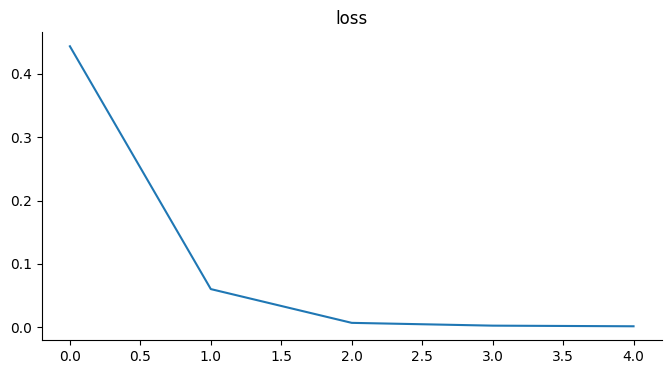

In [ ]:
from matplotlib import pyplot as plt
_df_12['loss'].plot(kind='line', figsize=(8, 4), title='loss')
plt.gca().spines[['top', 'right']].set_visible(False)

In [ ]:
_df_12

,loss,grad_norm,learning_rate,epoch,step
0,0.4434,2.700110,0.000091,1.0,7
1,0.0602,0.188152,0.000081,2.0,14
2,0.0069,0.055503,0.000071,3.0,21
3,0.0025,0.029672,0.000061,4.0,28
4,0.0015,0.018807,0.000051,5.0,35


In [ ]:
len(_df_12)

5

In [ ]:
trainer_history_eval_df.head()

,eval_loss,eval_accuracy,eval_runtime,eval_samples_per_second,eval_steps_per_second,epoch,step
0,0.111616,1.0,2.7532,18.161,0.726,1.0,7
1,0.009437,1.0,2.7148,18.418,0.737,2.0,14
2,0.002848,1.0,2.7193,18.387,0.735,3.0,21
3,0.001517,1.0,2.6910,18.580,0.743,4.0,28
4,0.001049,1.0,2.7505,18.178,0.727,5.0,35


from matplotlib import pyplot as plt
_df_16['eval_loss'].plot(kind='hist', bins=20, title='eval_loss')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_17['eval_runtime'].plot(kind='hist', bins=20, title='eval_runtime')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_18['eval_samples_per_second'].plot(kind='hist', bins=20, title='eval_samples_per_second')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_19['eval_steps_per_second'].plot(kind='hist', bins=20, title='eval_steps_per_second')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_20.plot(kind='scatter', x='eval_loss', y='eval_runtime', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_21.plot(kind='scatter', x='eval_runtime', y='eval_samples_per_second', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_22.plot(kind='scatter', x='eval_samples_per_second', y='eval_steps_per_second', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_23.plot(kind='scatter', x='eval_steps_per_second', y='epoch', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['eval_accuracy']
  ys = series['eval_loss']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_24.sort_values('eval_accuracy', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('eval_accuracy')
_ = plt.ylabel('eval_loss')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['eval_accuracy']
  ys = series['eval_samples_per_second']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_25.sort_values('eval_accuracy', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('eval_accuracy')
_ = plt.ylabel('eval_samples_per_second')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['eval_accuracy']
  ys = series['eval_steps_per_second']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_26.sort_values('eval_accuracy', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('eval_accuracy')
_ = plt.ylabel('eval_steps_per_second')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['eval_accuracy']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': 'eval_accuracy'}, axis=1)
              .sort_values('eval_accuracy', ascending=True))
  xs = counted['eval_accuracy']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_27.sort_values('eval_accuracy', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('eval_accuracy')
_ = plt.ylabel('count()')

from matplotlib import pyplot as plt
_df_28['eval_loss'].plot(kind='line', figsize=(8, 4), title='eval_loss')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_29['eval_runtime'].plot(kind='line', figsize=(8, 4), title='eval_runtime')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_30['eval_samples_per_second'].plot(kind='line', figsize=(8, 4), title='eval_samples_per_second')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_31['eval_steps_per_second'].plot(kind='line', figsize=(8, 4), title='eval_steps_per_second')
plt.gca().spines[['top', 'right']].set_visible(False)

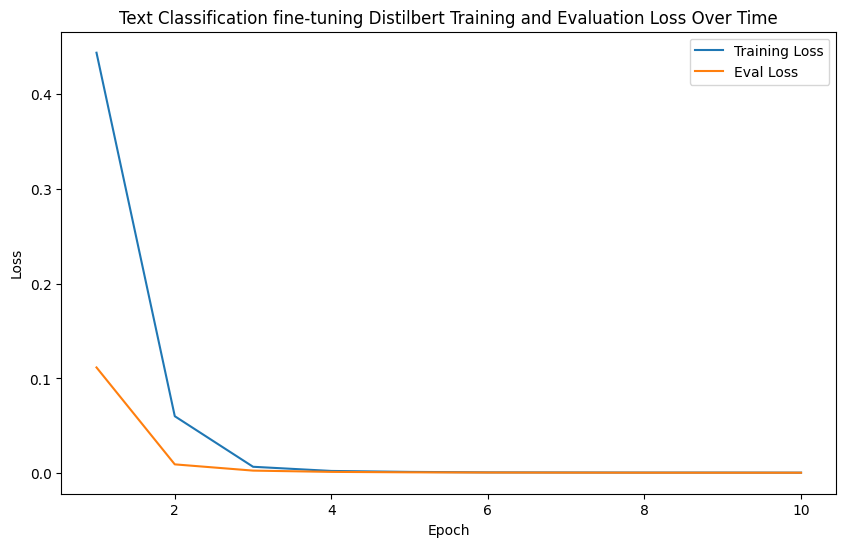

In [ ]:
# plot the loss curves

import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
plt.plot(trainer_history_train_df["epoch"], trainer_history_train_df["loss"], label="Training Loss")
plt.plot(trainer_history_eval_df["epoch"], trainer_history_eval_df["eval_loss"], label="Eval Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("Text Classification fine-tuning Distilbert Training and Evaluation Loss Over Time")
plt.legend()
plt.show()

If eval loss is higher than training loss = overfitting (memorizing the training set too well rather than learning generalizable patterns to unseen data)

To fix overfitting, introduce more regularization.
To fix underfitting (loss value not going down), introduce more learning capacity (more data, more parameters in the model, longer training).

In [ ]:
# Save our model to Hugging Face Hub

model_upload_url = trainer.push_to_hub(
    commit_message="Uploading food not food text classifier model",
    # token="YOUR_TOKEN_HERE"
)

print(f"[INFO] Model successfully uploaded to Hugging Face Hub with url: {model_upload_url}")

Upload 2 LFS files:   0%|          | 0/2 [00:00<?, ?it/s]

model.safetensors:   0%|          | 0.00/268M [00:00<?, ?B/s]

training_args.bin:   0%|          | 0.00/5.37k [00:00<?, ?B/s]

[INFO] Model successfully uploaded to Hugging Face Hub with url: https://huggingface.co/karenwky/learn_hf_food_not_food_text_classifier_distilbert-base-uncased/tree/main/


In [ ]:
# Perform predictions on test data

from transformers import AutoModelForSequenceClassification
from transformers import Trainer

model = AutoModelForSequenceClassification.from_pretrained(
    pretrained_model_name_or_path="karenwky/learn_hf_food_not_food_text_classifier_distilbert-base-uncased"
)

trainer = Trainer(
    model=model,
    processing_class=tokenizer,
    compute_metrics=compute_accuracy
)

predictions_all = trainer.predict(tokenized_dataset["test"])
predictions_all

wandb: WARNING The `run_name` is currently set to the same value as `TrainingArguments.output_dir`. If this was not intended, please specify a different run name by setting the `TrainingArguments.run_name` parameter.
wandb: Using wandb-core as the SDK backend.  Please refer to https://wandb.me/wandb-core for more information.


<IPython.core.display.Javascript object>

wandb: Logging into wandb.ai. (Learn how to deploy a W&B server locally: https://wandb.me/wandb-server)
wandb: You can find your API key in your browser here: https://wandb.ai/authorize
wandb: Paste an API key from your profile and hit enter:

 ··········


wandb: WARNING If you're specifying your api key in code, ensure this code is not shared publicly.
wandb: WARNING Consider setting the WANDB_API_KEY environment variable, or running `wandb login` from the command line.
wandb: No netrc file found, creating one.
wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc
wandb: Currently logged in as: learningjourney (learningjourney-n-a) to https://api.wandb.ai. Use `wandb login --relogin` to force relogin


PredictionOutput(predictions=array([[-3.5677197,  3.706374 ],
       [ 3.8934815, -3.6525705],
       [-3.567405 ,  3.705742 ],
       [ 3.9507878, -3.7181594],
       [ 3.9619315, -3.702302 ],
       [-3.57174  ,  3.7047293],
       [ 3.9392068, -3.6996813],
       [ 3.9510386, -3.7109802],
       [-3.5649836,  3.7069871],
       [-3.575888 ,  3.6872904],
       [-3.5680091,  3.7031615],
       [-3.556452 ,  3.7024894],
       [ 3.9220614, -3.683411 ],
       [-3.5704641,  3.700362 ],
       [-3.5592577,  3.6801834],
       [ 3.9412544, -3.7141087],
       [-3.5760133,  3.6933975],
       [ 3.9221973, -3.6499064],
       [-3.5669723,  3.7006066],
       [-3.5704134,  3.700106 ],
       [-3.5651085,  3.697522 ],
       [-3.5715623,  3.6975937],
       [ 3.9392912, -3.6790502],
       [ 3.943319 , -3.7060575],
       [-3.5710688,  3.7036793],
       [-3.5725162,  3.687647 ],
       [-3.5652313,  3.6868212],
       [ 3.9542124, -3.684983 ],
       [-3.5678587,  3.6983533],
       [ 3.935

In [ ]:
prediction_values = predictions_all.predictions
prediction_metrics = predictions_all.metrics

print("[INFO] Prediction metrics on the test data: ")
prediction_metrics

[INFO] Prediction metrics on the test data: 


{'test_loss': 0.0006289241719059646,
 'test_model_preparation_time': 0.0018,
 'test_accuracy': 1.0,
 'test_runtime': 4.313,
 'test_samples_per_second': 11.593,
 'test_steps_per_second': 1.623}

**Next step:** predicted logits -> prediction probabilities with torch.softmax (activation function) -> prodircted labels

\* logits: raw output of neural network

In [ ]:
import torch
from sklearn.metrics import accuracy_score

In [ ]:
# Model outputs raw logits

prediction_values[0]

array([-3.5677197,  3.706374 ], dtype=float32)

In [ ]:
# Softmax function converts all values between 0 & 1, and sum of all values equals 1
torch.softmax(torch.tensor(prediction_values[0]), dim=0)

tensor([6.9279e-04, 9.9931e-01])

In [ ]:
import numpy as np

def softmax(x):
    # Subtract the maximum value from x for numerical stability
    x_exp = np.exp(x - np.max(x))
    # Compute the softmax values
    softmax_values = x_exp / np.sum(x_exp)
    return softmax_values

# Example usage
logits = np.array([2.0, 1.0, 0.1])
probabilities = softmax(logits)
print(probabilities)

[0.65900114 0.24243297 0.09856589]


In [ ]:
np.exp(1)

np.float64(2.718281828459045)

In [ ]:
# 1. Get prediction probabilities with torch.softmax

pred_probs = torch.softmax(torch.tensor(prediction_values), dim=1)
pred_probs

tensor([[6.9279e-04, 9.9931e-01],
        [9.9947e-01, 5.2791e-04],
        [6.9344e-04, 9.9931e-01],
        [9.9953e-01, 4.6689e-04],
        [9.9953e-01, 4.6910e-04],
        [6.9115e-04, 9.9931e-01],
        [9.9952e-01, 4.8113e-04],
        [9.9953e-01, 4.7014e-04],
        [6.9426e-04, 9.9931e-01],
        [7.0039e-04, 9.9930e-01],
        [6.9481e-04, 9.9931e-01],
        [7.0336e-04, 9.9930e-01],
        [9.9950e-01, 4.9747e-04],
        [6.9505e-04, 9.9930e-01],
        [7.1720e-04, 9.9928e-01],
        [9.9953e-01, 4.7327e-04],
        [6.9604e-04, 9.9930e-01],
        [9.9949e-01, 5.1434e-04],
        [6.9731e-04, 9.9930e-01],
        [6.9527e-04, 9.9930e-01],
        [7.0077e-04, 9.9930e-01],
        [6.9621e-04, 9.9930e-01],
        [9.9951e-01, 4.9111e-04],
        [9.9952e-01, 4.7611e-04],
        [6.9234e-04, 9.9931e-01],
        [7.0250e-04, 9.9930e-01],
        [7.0822e-04, 9.9929e-01],
        [9.9952e-01, 4.8098e-04],
        [6.9827e-04, 9.9930e-01],
        [9.995

In [ ]:
# 2. Get the predicted labels
pred_labels = torch.argmax(pred_probs, dim=1)
pred_labels

tensor([1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0,
        1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1,
        0, 1])

In [ ]:
predictions_all.label_ids

array([1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1,
       0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0,
       1, 1, 1, 1, 0, 1])

In [ ]:
# 3. Get the true labels

true_labels = dataset["test"]["label"]
print(true_labels)

[1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1]


In [ ]:
print(tokenized_dataset["test"]["label"]) # alternative

[1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1]


In [ ]:
# 4. Compute prediction labels to true labels and get the test accuracy

test_accuracy = accuracy_score(y_true=true_labels,
                               y_pred=pred_labels)

print(f"[INFO] Test accuracy: {test_accuracy * 100}%")

[INFO] Test accuracy: 100.0%


Evaluate the model by sorting predictions by prediction probabilities and check where the model went wrong.

In [ ]:
# Make a DataFrame of test predictions

import pandas as pd

test_predictions_df = pd.DataFrame({
    "text": dataset["test"]["text"],
    "true_label": true_labels,
    "pred_label": pred_labels,
    "pred_prob": torch.max(pred_probs, dim=1).values
})

test_predictions_df

,text,true_label,pred_label,pred_prob
0,A slice of pepperoni pizza with a layer of mel...,1,1,0.999307
1,Red brick fireplace with a mantel serving as a...,0,0,0.999472
2,A bowl of sliced bell peppers with a sprinkle ...,1,1,0.999307
3,Set of mugs hanging on a hook,0,0,0.999533
4,Standing floor lamp providing light next to an...,0,0,0.999531
5,A bowl of sliced tomatoes with a sprinkle of b...,1,1,0.999309
6,Red ceramic mug sitting next to a coffee maker,0,0,0.999519
7,Wooden dresser with a mirror reflecting the room,0,0,0.999530
8,"Tangy tomato curry with chicken, featuring ten...",1,1,0.999306
9,Cherry tomatoes and mozzarella balls in a bowl...,1,1,0.999300


In [ ]:
test_predictions_df.head()

,text,true_label,pred_label,pred_prob
0,A slice of pepperoni pizza with a layer of mel...,1,1,0.999307
1,Red brick fireplace with a mantel serving as a...,0,0,0.999472
2,A bowl of sliced bell peppers with a sprinkle ...,1,1,0.999307
3,Set of mugs hanging on a hook,0,0,0.999533
4,Standing floor lamp providing light next to an...,0,0,0.999531


In [ ]:
# Show 10 examples with lowest prediection probability values

test_predictions_df.sort_values("pred_prob", ascending=True).head(10)

,text,true_label,pred_label,pred_prob
40,A bowl of cherries with a sprig of mint for ga...,1,1,0.999252
14,Two handfuls of bananas in a fruit bowl with g...,1,1,0.999283
42,"Boxes of apples, pears, pineapple, manadrins a...",1,1,0.999291
26,A fruit platter with a variety of exotic fruit...,1,1,0.999292
11,A close-up shot of a cheesy pizza slice being ...,1,1,0.999297
49,Plate of sushi served with pickled ginger and ...,1,1,0.999297
25,A bowl of sliced mango with a drizzle of honey...,1,1,0.999297
20,"Pizza with a seafood theme, featuring toppings...",1,1,0.999299
9,Cherry tomatoes and mozzarella balls in a bowl...,1,1,0.999300
37,"Close-up of a sushi roll with avocado, cucumbe...",1,1,0.999301


Two main ways to perform inference:

1. **Pipeline mode** - Using `transformers.pipeline` to load the model and perform text classification.
2. **PyTorch mode** - Using a combination of `transformers.AutoTokenizer` and `transformers.AutoModelForSequenceClassification` and passing each the target model name.

Each mode support:

1. Predictions one at a time (fast but can be slower with many samples).
  * e.g. spam comment detection, real-time system
2. Batches of predictions at a time (faster but up to a point, depending on the batch size used)
  * e.g. large static database or many samples coming in at once

In [ ]:
local_model_path = ""
huggingface_model_path = "karenwky/learn_hf_food_not_food_text_classifier_distilbert-base-uncased"

In [ ]:
# Setup device for making predictions

def set_device():
  if torch.cuda.is_available():
    device = torch.device("cuda")
  elif torch.backends.mps.is_available() and torch.backends.mps.is_built():
    device = torch.device("mps")
  else:
    device = torch.device("cpu")
  return device

In [ ]:
DEVICE = set_device()
print(f"[INFO] Using device: {DEVICE}")

[INFO] Using device: cpu


In [ ]:
!nvidia-smi

/bin/bash: line 1: nvidia-smi: command not found


In [ ]:
import torch
from transformers import pipeline

In [ ]:
# Set the batch size

BATCH_SIZE = 32 # experimental hyperparameter; prediction speed often increases with higher batch size

# Create an instance of transformers.pipeline

food_not_food_classifier = pipeline(task="text-classification",
                                    model=huggingface_model_path,
                                    device=DEVICE,
                                    top_k=1, # number of samples output by the model
                                    batch_size=BATCH_SIZE)

food_not_food_classifier

tokenizer_config.json:   0%|          | 0.00/1.23k [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/712k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/125 [00:00<?, ?B/s]

Device set to use cpu


`top_k` - The number of top labels that will be returned by the pipeline. If the provided number is None or higher than the number of labels available in the model configuration, it will default to the number of labels.

In [ ]:
test_custom_sentence = "The cat is sleepy~"
food_not_food_classifier(test_custom_sentence)

[[{'label': 'not_food', 'score': 0.9992610812187195}]]

In [ ]:
test_custom_sentence = "The cat stole the fish!"
food_not_food_classifier(test_custom_sentence)

[[{'label': 'not_food', 'score': 0.9991030693054199}]]

In [ ]:
test_custom_sentence = "The cat is having its meal."
food_not_food_classifier(test_custom_sentence)

[[{'label': 'not_food', 'score': 0.9979894161224365}]]

In [ ]:
test_custom_sentence = "The cat food is looking good."
food_not_food_classifier(test_custom_sentence)

[[{'label': 'not_food', 'score': 0.9982931017875671}]]

In [ ]:
test_custom_sentence = "My cat having salmon for its meal"
food_not_food_classifier(test_custom_sentence)

[[{'label': 'not_food', 'score': 0.6080297231674194}]]

In [ ]:
test_custom_sentence = "Strawberry icecream cake with a cherry on top"
food_not_food_classifier(test_custom_sentence)

[[{'label': 'food', 'score': 0.9992712140083313}]]

In [ ]:
test_custom_sentence = "My local coffee shop has the best croissants"
food_not_food_classifier(test_custom_sentence)

[[{'label': 'not_food', 'score': 0.998696506023407}]]

In [ ]:
test_custom_sentence = "A plate of croissants in the coffee shop"
food_not_food_classifier(test_custom_sentence)

[[{'label': 'not_food', 'score': 0.9915870428085327}]]

In [ ]:
test_custom_sentence = "A plate of croissants"
food_not_food_classifier(test_custom_sentence)

[[{'label': 'food', 'score': 0.9941326975822449}]]

In [ ]:
test_custom_sentence = "The restaurant selling fried rice"
food_not_food_classifier(test_custom_sentence)

[[{'label': 'food', 'score': 0.999099850654602}]]

In [ ]:
food_not_food_classifier = pipeline(task="text-classification",
                                    model=huggingface_model_path,
                                    device=DEVICE,
                                    top_k=2,
                                    batch_size=BATCH_SIZE)

food_not_food_classifier

Device set to use cpu


In [ ]:
test_custom_sentence = "The restaurant selling fried rice"
food_not_food_classifier(test_custom_sentence)

[[{'label': 'food', 'score': 0.999099850654602},
  {'label': 'not_food', 'score': 0.0009001468424685299}]]

In [ ]:
del food_not_food_classifier

In [ ]:
food_not_food_classifier = pipeline(task="text-classification",
                                    model=huggingface_model_path,
                                    device=DEVICE,
                                    batch_size=BATCH_SIZE)

food_not_food_classifier

Device set to use cpu


In [ ]:
test_custom_sentence = "The restaurant selling fried rice"
food_not_food_classifier(test_custom_sentence)

[{'label': 'food', 'score': 0.999099850654602}]

In [ ]:
# Create a list of sentences to make predictions on

sentences = [
    "I whipped up a fresh batch of code, but it seems to have a syntax error.",
    "We need to marinate these ideas overnight before presenting them to the client.",
    "The new software is definitely a spicy upgrade, taking some time to get used to.",
    "Her social media post was the perfect recipe for a viral sensation.",
    "He served up a rebuttal full of facts, leaving his opponent speechless.",
    "The team needs to simmer down a bit before tackling the next challenge.",
    "The presentation was a delicious blend of humor and information, keeping the audience engaged.",
    "A beautiful array of fake wax foods (shokuhin sampuru) in the front of a Japanese restaurant.",
    "Daniel Bourke is really cool :D",
    "My favoruite food is biltong!"
]

food_not_food_classifier(sentences)

[{'label': 'not_food', 'score': 0.9973229765892029},
 {'label': 'not_food', 'score': 0.9983121156692505},
 {'label': 'not_food', 'score': 0.9963198900222778},
 {'label': 'not_food', 'score': 0.9927545189857483},
 {'label': 'not_food', 'score': 0.9917137622833252},
 {'label': 'not_food', 'score': 0.9962466359138489},
 {'label': 'not_food', 'score': 0.7917941808700562},
 {'label': 'food', 'score': 0.9992499947547913},
 {'label': 'not_food', 'score': 0.9989325404167175},
 {'label': 'food', 'score': 0.9862335920333862}]

In [ ]:
import time

# Create 1000 sentences

sentences_1000 = sentences * 100

len(sentences_1000)

1000

In [ ]:
%%time

food_not_food_classifier(sentences_1000)

# CPU times: user 52.8 s, sys: 184 ms, total: 53 s
# Wall time: 1min 5s

CPU times: user 52.8 s, sys: 184 ms, total: 53 s
Wall time: 1min 5s


[{'label': 'not_food', 'score': 0.9973229765892029},
 {'label': 'not_food', 'score': 0.9983121156692505},
 {'label': 'not_food', 'score': 0.9963198900222778},
 {'label': 'not_food', 'score': 0.9927545189857483},
 {'label': 'not_food', 'score': 0.9917137622833252},
 {'label': 'not_food', 'score': 0.9962466359138489},
 {'label': 'not_food', 'score': 0.7917941808700562},
 {'label': 'food', 'score': 0.9992499947547913},
 {'label': 'not_food', 'score': 0.9989325404167175},
 {'label': 'food', 'score': 0.9862335920333862},
 {'label': 'not_food', 'score': 0.9973229765892029},
 {'label': 'not_food', 'score': 0.9983121156692505},
 {'label': 'not_food', 'score': 0.9963198900222778},
 {'label': 'not_food', 'score': 0.9927545189857483},
 {'label': 'not_food', 'score': 0.9917137622833252},
 {'label': 'not_food', 'score': 0.9962466359138489},
 {'label': 'not_food', 'score': 0.7917941808700562},
 {'label': 'food', 'score': 0.9992499947547913},
 {'label': 'not_food', 'score': 0.9989325404167175},
 {'la

In [ ]:
# Time how long it takes to make predictions on all sentences (one at a time)

%%time

print(f"[INFO] Number of sentences: {len(sentences_1000)}")

start_time_one_at_a_time = time.time()

food_not_food_classifier(sentences_1000)

end_time_one_at_a_time = time.time()

total_time_one_at_a_time = end_time_one_at_a_time - start_time_one_at_a_time
avg_time_one_at_a_time = total_time_one_at_a_time / len(sentences_1000)

print(f"[INFO] Total time for making predictions on {len(sentences_1000)} samples in batch mode: {total_time_one_at_a_time}s")
print(f"[INFO] Average time per prediction in batch mode: {avg_time_one_at_a_time}s")

[INFO] Number of sentences: 1000
[INFO] Total time for making predictions on 1000 samples in batch mode: 47.120917320251465s
[INFO] Average time per prediction in batch mode: 0.04712091732025146s
CPU times: user 43.1 s, sys: 92.6 ms, total: 43.2 s
Wall time: 47.1 s


In [ ]:
# Time how long it takes to make predictions on all sentences (one at a time)

print(f"[INFO] Number of sentences: {len(sentences_1000)}")

start_time_one_at_a_time = time.time()

for sentence in sentences_1000:

  # Make a prediction
  food_not_food_classifier(sentences)

end_time_one_at_a_time = time.time()

total_time_one_at_a_time = end_time_one_at_a_time - start_time_one_at_a_time
avg_time_one_at_a_time = total_time_one_at_a_time / len(sentences_1000)

print(f"[INFO] Total time for making predictions on {len(sentences_1000)} samples one at a time: {total_time_one_at_a_time}s")
print(f"[INFO] Average time per prediction one at a time: {avg_time_one_at_a_time}s")

[INFO] Number of sentences: 1000
[INFO] Total time for making predictions on 1000 samples: 652.520405292511s
[INFO] Average time per prediction: 0.652520405292511s


In [ ]:
# Predict in batches using pipeline

%%time

for i in [10, 100, 1000, 10_000]:
  sentences_big = sentences * i
  print(f"[INFO] Number of senteces: {len(sentences_big)}")

  start_time = time.time()

  food_not_food_classifier(sentences_big)

  end_time = time.time()

  total_time_all_sentences_batch_mode = end_time - start_time
  avg_time_per_sentence_batch_mode = total_time_all_sentences_batch_mode / len(sentences_big)

  print(f"[INFO] Total time for making predictions on {len(sentences_big)} samples in batch mode: {total_time_all_sentences_batch_mode}s")
  print(f"[INFO] Average time per prediction in batch mode: {avg_time_per_sentence_batch_mode}s")

\* Apart from dataset size, can also experiment on different batch size for inference time.

## Make predictions with PyTorch

Steps with PyTorch predictions:

1. Create the tokenizer with `AutoTokenizer`.
2. Create the model with `AutoModel` (`AutoModelForSequenceClassification` for this project).
3. Tokenize text with Step 1.
4. Make prediction with Step 2.
5. Format predictions.

\* `transformers.pipeline` handles and bundles theses steps behind the scenes.

In [ ]:
from transformers import AutoTokenizer

# Setup the model path
model_path = "karenwky/learn_hf_food_not_food_text_classifier_distilbert-base-uncased"

# Create an example to predict on
sample_food_text = "Blueberry muffins on the plate"

# Prepare the tokenizer
tokenizer = AutoTokenizer.from_pretrained(pretrained_model_name_or_path=model_path)
inputs = tokenizer(sample_food_text)
inputs

{'input_ids': [101, 2630, 9766, 14163, 15379, 2015, 2006, 1996, 5127, 102], 'attention_mask': [1, 1, 1, 1, 1, 1, 1, 1, 1, 1]}

In [ ]:
inputs = tokenizer(sample_food_text,
                   return_tensors="pt") # "pt" stands for PyTorch
inputs

{'input_ids': tensor([[  101,  2630,  9766, 14163, 15379,  2015,  2006,  1996,  5127,   102]]), 'attention_mask': tensor([[1, 1, 1, 1, 1, 1, 1, 1, 1, 1]])}

In [ ]:
from transformers import AutoModelForSequenceClassification

# Load the text classification model
model = AutoModelForSequenceClassification.from_pretrained(pretrained_model_name_or_path=model_path)
model

DistilBertForSequenceClassification(
  (distilbert): DistilBertModel(
    (embeddings): Embeddings(
      (word_embeddings): Embedding(30522, 768, padding_idx=0)
      (position_embeddings): Embedding(512, 768)
      (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (transformer): Transformer(
      (layer): ModuleList(
        (0-5): 6 x TransformerBlock(
          (attention): DistilBertSdpaAttention(
            (dropout): Dropout(p=0.1, inplace=False)
            (q_lin): Linear(in_features=768, out_features=768, bias=True)
            (k_lin): Linear(in_features=768, out_features=768, bias=True)
            (v_lin): Linear(in_features=768, out_features=768, bias=True)
            (out_lin): Linear(in_features=768, out_features=768, bias=True)
          )
          (sa_layer_norm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
          (ffn): FFN(
            (dropout): Dropout(p=0.1, inplace=False)


In [ ]:
model.config # config.json

DistilBertConfig {
  "_attn_implementation_autoset": true,
  "activation": "gelu",
  "architectures": [
    "DistilBertForSequenceClassification"
  ],
  "attention_dropout": 0.1,
  "dim": 768,
  "dropout": 0.1,
  "hidden_dim": 3072,
  "id2label": {
    "0": "not_food",
    "1": "food"
  },
  "initializer_range": 0.02,
  "label2id": {
    "food": 1,
    "not_food": 0
  },
  "max_position_embeddings": 512,
  "model_type": "distilbert",
  "n_heads": 12,
  "n_layers": 6,
  "pad_token_id": 0,
  "problem_type": "single_label_classification",
  "qa_dropout": 0.1,
  "seq_classif_dropout": 0.2,
  "sinusoidal_pos_embds": false,
  "tie_weights_": true,
  "torch_dtype": "float32",
  "transformers_version": "4.51.3",
  "vocab_size": 30522
}

\* Why not downloading anything? Because the model is already downloaded in `huggingface_model_path`, the library finds the existing version of the model rather than downloading a new one. However, if the model has been updated, the library will download it again.

In [ ]:
import torch

model.eval() # switch off all the gradient tracking so to speed up inference time

# with torch.no_grad(): -> no need to update gradients
with torch.inference_mode():
  outputs = model(**inputs) # "**" means input all dictionary keys as named arguments/parameters -> input_ids and attention_mask as arguments
  outputs_verbose = model(input_ids=inputs["input_ids"],
                  attention_mask=inputs["attention_mask"])

In [ ]:
outputs

SequenceClassifierOutput(loss=None, logits=tensor([[-3.4662,  3.5274]]), hidden_states=None, attentions=None)

In [ ]:
outputs_verbose

SequenceClassifierOutput(loss=None, logits=tensor([[-3.4662,  3.5274]]), hidden_states=None, attentions=None)

In [ ]:
# Convert logits to prediction probability + label

predicted_class_id = outputs.logits.argmax().item() # item() make the output no longer a tensor
predicted_class_id

1

In [ ]:
outputs.logits

tensor([[-3.4662,  3.5274]])

In [ ]:
outputs.logits.argmax()

tensor(1)

In [ ]:
prediction_probability = torch.softmax(outputs.logits, dim=1).max().item()
prediction_probability

0.9990830421447754

In [ ]:
torch.softmax(outputs.logits, dim=1)

tensor([[9.1692e-04, 9.9908e-01]])

In [ ]:
print(f"Text: {sample_food_text}")
print(f"Predicted label: {model.config.id2label[predicted_class_id]}")
print(f"Prediction probability: {prediction_probability}")

Text: Blueberry muffins on the plate
Predicted label: food
Prediction probability: 0.9990830421447754


In [ ]:
food_not_food_classifier(sample_food_text)

[{'label': 'food', 'score': 0.9990830421447754}]

## Putting it all together in one cell

In [ ]:
# 1. Import necessary packages
import pprint
from pathlib import Path

import numpy as np
import torch
from typing import Tuple

try:
  import datasets, evaluate, accelerate
  import gradio as gr
except ModuleNotFoundError:
  !pip install -U datasets evaluate accelerate gradio hf_xet
  import datasets, evaluate, accelerate
  import gradio as gr

from transformers import pipeline
from transformers import TrainingArguments, Trainer
from transformers import AutoTokenizer, AutoModelForSequenceClassification

# 2. Set up variables for model training and saving pipeline
DATASET_NAME = "mrdbourke/learn_hf_food_not_food_image_captions"
MODEL_NAME = "distilbert/distilbert-base-uncased"
MODEL_SAVE_DIR_NAME = "models/learn_hf_food_not_food_text_classifier_distilbert-base-uncased"

# 3. Create a directory for saving models
print(f"[INFO] Creating directory for saving models: {MODEL_SAVE_DIR_NAME}")
model_save_dir = Path(MODEL_SAVE_DIR_NAME)
model_save_dir.mkdir(parents=True, exist_ok=True)

# 4. Load and preprocess the dataset from Hugging Face Hub
print(f"[INFO] Downloading dataset from Hugging Face Hub: {DATASET_NAME}")
dataset = datasets.load_dataset(DATASET_NAME)

## Mapping for labels and IDs
id2label = {idx: label for idx, label in enumerate(dataset["train"].unique("label")[::-1])}
label2id = {label: idx for idx, label in enumerate(dataset["train"].unique("label")[::-1])}

## Create function to map IDs to labels in dataset
def map_labels_to_number(example):
  example["label"] = label2id[example["label"]]
  return example

## Map preprocessing function to the dataset
dataset = dataset["train"].map(map_labels_to_number)

## Split the dataset into train/test sets
dataset = dataset.train_test_split(test_size=0.2, seed=42)

# 5. Import a tokenizer and map it to our dataset
print(f"[INFO] Tokenizing text for model training with tokenizer: {MODEL_NAME}")
tokenizer = AutoTokenizer.from_pretrained(pretrained_model_name_or_path=MODEL_NAME,
                                          use_fast=True)

## Create function to tokenize text samples
def tokenize_text(examples):
  return tokenizer(examples["text"],
                   padding=True,
                   truncation=True) # max_position_embeddings in config.json

## Tokenize the dataset
tokenized_dataset = dataset.map(function=tokenize_text,
                                batched=True,
                                batch_size=1000)

# 6. Set up an evaluation metric
accuracy_metric = evaluate.load("accuracy")

## Create function to evaluate the model
def compute_accuracy(predictions_and_labels: Tuple[np.array, np.array]):
  predictions, labels = predictions_and_labels

  if len(predictions.shape) >= 2:
    predictions = np.argmax(predictions, axis=1)

  return accuracy_metric.compute(predictions=predictions, references=labels)

# 7. Set up a model
print(f"[INFO] Loading model: {MODEL_NAME}")
model = AutoModelForSequenceClassification.from_pretrained(
    pretrained_model_name_or_path=MODEL_NAME,
    num_labels=2,
    id2label=id2label,
    label2id=label2id
)
print(f"[INFO] Model loading complete!")

## Set up TrainingArguments (model hyperparameters)
### Hyperparameters = setting that developers can adjust
### Parameters = weights the model learns on its own
training_args = TrainingArguments(
    output_dir=model_save_dir,
    learning_rate=0.0001,
    per_device_train_batch_size=32,
    per_device_eval_batch_size=32,
    num_train_epochs=10,
    eval_strategy="epoch",
    save_strategy="epoch",
    save_total_limit=3,
    use_cpu=False,
    seed=42,
    load_best_model_at_end=True,
    logging_strategy="epoch",
    report_to="none",
    push_to_hub=False,
    hub_private_repo=False
)

## Create Trainer instance
trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=tokenized_dataset["train"],
    eval_dataset=tokenized_dataset["test"],
    processing_class=tokenizer,
    compute_metrics=compute_accuracy
)

# 8. Train the model
print(f"[INFO] Commencing model training...")
results = trainer.train()

# 9. Save the train model
print(f"[INFO] Model training complete, saving model to local path: {MODEL_SAVE_DIR_NAME}")
trainer.save_model(output_dir=model_save_dir)

# 10. Push the model to Hugging Face Hub
# print(f"[INFO] Uploading model to Hugging Face Hub...")
# model_upload_url = trainer.push_to_hub(
#     commit_message="Uploading food not food text classifier model (putting it all together!)"
# )
# print(f"[INFO] Model upload complete, model available at: {model_upload_url}")

# 11. Evaluate the model on test data
print(f"[INFO] Performing evaluation on test dataset...")
predictions_all = trainer.predict(tokenized_dataset["test"])
perdiction_values = predictions_all.predictions
prediction_metrics = predictions_all.metrics

print(f"[INFO] Prediction metrics on test data:")
pprint.pprint(prediction_metrics)

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 491.2/491.2 kB 16.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 84.0/84.0 kB 4.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 354.7/354.7 kB 27.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.9/46.9 MB 16.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 322.2/322.2 kB 12.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.8/53.8 MB 10.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 10.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 95.2/95.2 kB 8.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 183.9/183.9 kB 14.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 143.5/143.5 kB 12.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.5/11.5 MB 90.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 72.0/72.0 kB 7.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

README.md:   0%|          | 0.00/1.32k [00:00<?, ?B/s]

train-00000-of-00001.parquet:   0%|          | 0.00/11.9k [00:00<?, ?B/s]

Generating train split:   0%|          | 0/250 [00:00<?, ? examples/s]

Map:   0%|          | 0/250 [00:00<?, ? examples/s]

[INFO] Tokenizing text for model training with tokenizer: distilbert/distilbert-base-uncased


tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/483 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

Map:   0%|          | 0/200 [00:00<?, ? examples/s]

Map:   0%|          | 0/50 [00:00<?, ? examples/s]

[INFO] Loading model: distilbert/distilbert-base-uncased


model.safetensors:   0%|          | 0.00/268M [00:00<?, ?B/s]

Some weights of DistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert/distilbert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight', 'pre_classifier.bias', 'pre_classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


[INFO] Model loading complete!
[INFO] Commencing model training...


Epoch,Training Loss,Validation Loss,Accuracy
1,0.323600,0.036143,1.000000
2,0.017900,0.004701,1.000000
3,0.003800,0.001788,1.000000
4,0.001800,0.001053,1.000000
5,0.001100,0.000770,1.000000
6,0.000900,0.000636,1.000000
7,0.000800,0.000563,1.000000
8,0.000700,0.000524,1.000000
9,0.000600,0.000503,1.000000
10,0.000600,0.000497,1.000000


[INFO] Model training complete, saving model to local path: models/learn_hf_food_not_food_text_classifier_distilbert-base-uncased
[INFO] Performing evaluation on test dataset...


[INFO] Prediction metrics on test data:
{'test_accuracy': 1.0,
 'test_loss': 0.0004965405678376555,
 'test_runtime': 0.093,
 'test_samples_per_second': 537.547,
 'test_steps_per_second': 21.502}


In [ ]:
results

TrainOutput(global_step=70, training_loss=0.03517329118081502, metrics={'train_runtime': 171.9203, 'train_samples_per_second': 11.633, 'train_steps_per_second': 0.407, 'total_flos': 18110777160000.0, 'train_loss': 0.03517329118081502, 'epoch': 10.0})

In [ ]:
results.metrics

{'train_runtime': 171.9203,
 'train_samples_per_second': 11.633,
 'train_steps_per_second': 0.407,
 'total_flos': 18110777160000.0,
 'train_loss': 0.03517329118081502,
 'epoch': 10.0}

In [ ]:
# GPU model training - accidentally click 2nd time, seems quicker than the 1st time...
results = trainer.train()
results

Epoch,Training Loss,Validation Loss,Accuracy
1,0.000200,0.000144,1.000000
2,0.000200,0.000124,1.000000
3,0.000200,0.000109,1.000000
4,0.000100,0.000099,1.000000
5,0.000100,0.000091,1.000000
6,0.000100,0.000085,1.000000
7,0.000100,0.000081,1.000000
8,0.000100,0.000079,1.000000
9,0.000100,0.000077,1.000000
10,0.000100,0.000077,1.000000


TrainOutput(global_step=70, training_loss=0.00014130744550909315, metrics={'train_runtime': 107.5391, 'train_samples_per_second': 18.598, 'train_steps_per_second': 0.651, 'total_flos': 18110777160000.0, 'train_loss': 0.00014130744550909315, 'epoch': 10.0})

In [ ]:
!nvidia-smi

Sat Apr 19 13:49:52 2025       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 550.54.15              Driver Version: 550.54.15      CUDA Version: 12.4     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  Tesla T4                       Off |   00000000:00:04.0 Off |                    0 |
| N/A   52C    P0             26W /   70W |    1940MiB /  15360MiB |      0%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

In [ ]:
# 12. Make sure the model works by testing it on a custom sample
from transformers import pipeline
food_not_food_classifier = pipeline(task="text-classification",
                                    model=model_save_dir, # model_upload_url
                                    device=torch.device("cuda") if torch.cuda.is_available() else torch.device("cpu"),
                                    top_k=1,
                                    batch_size=32)

food_not_food_classifier("Mission completed!")

Device set to use cuda


[[{'label': 'not_food', 'score': 0.9990476965904236}]]

## Create a function to perform inference

1. Take an input of string.
2. Set up a text classification pipeline.
3. Get the output from the pipeline.
4. Return the output from the pipeline in Step 3 as a formatted dictionary: `{"label_1": probability_1, "label_2": probability_2}`

In [ ]:
from typing import Dict

# Create a function to take a string input
def food_not_food_classifier(text: str) -> Dict[str, float]:

  # Set up food not food text classifier
  food_not_food_classifier_pipeline = pipeline(task="text-classification",
                                      model=MODEL_SAVE_DIR_NAME,
                                      batch_size=32,
                                      device="cuda" if torch.cuda.is_available() else "cpu",
                                      top_k=None)

  # Get the output from the pipeline
  outputs = food_not_food_classifier_pipeline(text)[0]

  # Format output for Gradio
  output_dict = {}
  for item in outputs:
    output_dict[item["label"]] = item["score"]

  return output_dict

In [ ]:
food_not_food_classifier("I'm sleepy right now")

Device set to use cuda


{'not_food': 0.9986594915390015, 'food': 0.0013405062491074204}

In [ ]:
# 1. Import gradio
import gradio as gr

# 2. Create gradio interface
demo = gr.Interface(
    fn=food_not_food_classifier,
    inputs="text",
    outputs=gr.Label(num_top_classes=2), # configure top n classes for multi-class classification
    title="Food Not Food Classifier",
    description="A text classifier to determine if a sentence is about food or not.",
    examples=[["Today is a sunny day."],
              ["Pineapple fried rice."]]
)

# 3. Launch the interface
demo.launch()

It looks like you are running Gradio on a hosted a Jupyter notebook. For the Gradio app to work, sharing must be enabled. Automatically setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://a2e7bba326a56e8634.gradio.live

This share link expires in 1 week. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)


In [3]:
from pathlib import Path

# Make directory for demos
demos_dir = Path("../demos")
demos_dir.mkdir(exist_ok=True)

# Create a folder for the food_not_food_text_classifier demo
food_not_food_text_classifier_demo_dir = Path(demos_dir, "food_not_food_text_classifier")
food_not_food_text_classifier_demo_dir.mkdir(exist_ok=True)

In [4]:
%%writefile ../demos/food_not_food_text_classifier/app.py
# Import required packages
import torch
import gradio as gr

from typing import Dict
from transformers import pipeline

# Define a function to use the model
def food_not_food_classifier(text: str) -> Dict[str, float]:

  # Set up food not food text classifier
  food_not_food_classifier_pipeline = pipeline(task="text-classification",
                                      model="karenwky/learn_hf_food_not_food_text_classifier_distilbert-base-uncased",
                                      batch_size=32,
                                      device="cuda" if torch.cuda.is_available() else "cpu",
                                      top_k=None)

  # Get the output from the pipeline
  outputs = food_not_food_classifier_pipeline(text)[0]

  # Format output for Gradio
  output_dict = {}
  for item in outputs:
    output_dict[item["label"]] = item["score"]

  return output_dict

# Create a Gradio interface with detilas about the app
description = """
A text classifier to determine if a sentence is about food or not food.

Fine-tuned from [DistilBERT](https://huggingface.co/distilbert/distilbert-base-uncased) on a [LLM-generated dataset of food/not_food image captions](https://huggingface.co/datasets/mrdbourke/learn_hf_food_not_food_image_captions).
"""

demo = gr.Interface(
    fn=food_not_food_classifier,
    inputs="text",
    outputs=gr.Label(num_top_classes=2),
    title="🍔🚫🍰 Food or Not Food Text Classifier",
    description=description,
    examples=[["Today is a sunny day."],
              ["Pineapple fried rice."]]
)

# Launch the interface
if __name__ == "__main__":
  demo.launch()

Writing ../demos/food_not_food_text_classifier/app.py


**Note:** Python's `if __name__ == "__main__"` is useful to include code that's executed only when a script is run directly but not when it's imported.

[Spaces Configuration Reference](https://huggingface.co/docs/hub/en/spaces-config-reference)

Spaces are configured through the YAML block at the top of the README.md file at the root of the repository.

For gradio latest version, check [PyPI](https://pypi.org/project/gradio/).

- "colorTo" must be one of [red, yellow, green, blue, indigo, purple, pink, gray]

In [14]:
%%writefile ../demos/food_not_food_text_classifier/README.md
---
title: Food Not Food Text Classifier
emoji: 🍔🚫🍰
colorFrom: yellow
colorTo: red
sdk: gradio
sdk-version: 5.25.2
app_file: app.py
pinned: false
license: mit
---

# 🍔🚫🍰 Food or Not Food Text Classifier

Demo to showcase a text classifier to determine if a sentence is about food or not food.

[DistilBERT](https://huggingface.co/distilbert/distilbert-base-uncased) model fine-tuned on a small [synthetic dataset]((https://huggingface.co/datasets/mrdbourke/learn_hf_food_not_food_image_captions)) of 250 generated food/not_food image captions.


Overwriting ../demos/food_not_food_text_classifier/README.md


In [7]:
%%writefile ../demos/food_not_food_text_classifier/requirements.txt
gradio
torch
transformers

Writing ../demos/food_not_food_text_classifier/requirements.txt


`huggingface_hub` is included in `transformers` library

In [9]:
# Import required methods for uploading to HF Hub
from huggingface_hub import (
    create_repo,
    get_full_repo_name,
    upload_file,
    upload_folder
)

In [10]:
# Define Space parameters
LOCAL_DEMO_FOLDER_PATH_TO_UPLOAD = "../demos/food_not_food_text_classifier"
HF_TARGET_SPACE_NAME = "learn_hf_food_not_food_text_classifier_demo"
HF_REPO_TYPE = "space" # model / dataset
HF_SPACE_SDK = "gradio"

In [11]:
# Create Space repo
print(f"[INFO] Creating repo on Hugging Face Hub with name: {HF_TARGET_SPACE_NAME}")

create_repo(repo_id=HF_TARGET_SPACE_NAME,
            repo_type=HF_REPO_TYPE,
            private=False,
            space_sdk=HF_SPACE_SDK,
            exist_ok=True)

[INFO] Creating repo on Hugging Face Hub with name: learn_hf_food_not_food_text_classifier_demo


RepoUrl('https://huggingface.co/spaces/karenwky/learn_hf_food_not_food_text_classifier_demo', endpoint='https://huggingface.co', repo_type='space', repo_id='karenwky/learn_hf_food_not_food_text_classifier_demo')

`get_full_repo_name` [[doc]](https://huggingface.co/docs/huggingface_hub/en/package_reference/hf_api#huggingface_hub.HfApi.get_full_repo_name)

**token** (Union[bool, str, None], optional) — A valid user access token (string). Defaults to the locally saved token.

In [12]:
# Get the full repo name
hf_full_repo_name = get_full_repo_name(model_id=HF_TARGET_SPACE_NAME)
print(f"[INFO] Full Hugging Face Space repo name: {hf_full_repo_name}")

[INFO] Full Hugging Face Space repo name: karenwky/learn_hf_food_not_food_text_classifier_demo


In [15]:
# Upload demo folder
print(f"[INFO] Uploadint {LOCAL_DEMO_FOLDER_PATH_TO_UPLOAD} to HF Space repo: {hf_full_repo_name}")

folder_upload_url = upload_folder(repo_id=hf_full_repo_name,
                                  folder_path=LOCAL_DEMO_FOLDER_PATH_TO_UPLOAD,
                                  path_in_repo=".", # root folder in repo
                                  repo_type=HF_REPO_TYPE,
                                  commit_message="Upload food not food text classifier demo from notebook")

print(f"[INFO] Demo folder successfully uploaded with commit URL: {folder_upload_url}")

[INFO] Uploadint ../demos/food_not_food_text_classifier to HF Space repo: karenwky/learn_hf_food_not_food_text_classifier_demo
[INFO] Demo folder successfully uploaded with commit URL: https://huggingface.co/spaces/karenwky/learn_hf_food_not_food_text_classifier_demo/tree/main/.


In [1]:
from IPython.display import HTML

HTML(data="""
<iframe
	src="https://karenwky-learn-hf-food-not-food-text-classifier-demo.hf.space"
	frameborder="0"
	width="850"
	height="450"
></iframe>
""")